## Regresiones

In [3]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


#### Acá hacemos merge de los datasets

In [11]:
import pandas as pd
from difflib import get_close_matches
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

scraped_data_path = 'csvs/scraped_data.csv'
maestra_8_path = '../raw_data/ConvenioMarco/vehiculos_2023/MaestraProd_cm_2239-8-lr23.csv'
maestra_5_path = '../raw_data/ConvenioMarco/vehiculos_2021/MaestraProd_cm_2239-5-lr21.csv'
maestra_4_path = '../raw_data/ConvenioMarco/vehiculos_2017/MaestraProd_cm_2239-4-lr17.csv'
combined_transactions_path = 'csvs/combined_transacciones_cm.csv'

scraped_data_encoding = detect_encoding(scraped_data_path)
maestra_8_encoding = detect_encoding(maestra_8_path)
maestra_5_encoding = detect_encoding(maestra_5_path)
maestra_4_encoding = detect_encoding(maestra_4_path)
combined_transactions_encoding = detect_encoding(combined_transactions_path)

scraped_data = pd.read_csv(scraped_data_path, encoding=scraped_data_encoding)
maestra_8 = pd.read_csv(maestra_8_path, delimiter=';', encoding=maestra_8_encoding)
maestra_5 = pd.read_csv(maestra_5_path, delimiter=';', encoding=maestra_5_encoding)
maestra_4 = pd.read_csv(maestra_4_path, delimiter=';', encoding=maestra_4_encoding)
combined_transactions = pd.read_csv(combined_transactions_path, encoding=combined_transactions_encoding)


maestra_8["MARCA_MODELO"] = maestra_8["MARCA"] + " " + maestra_8["MODELO"]
maestra_5["MARCA_MODELO"] = maestra_5["Marca"] + " " + maestra_5["Modelo"]
maestra_4["MARCA_MODELO"] = maestra_4["Marca"] + " " + maestra_4["Modelo"]



Sample from maestra_8:
   MARCA                    MODELO                    MARCA_MODELO
0  MAXUS  T60 SC DX E6 4X4 MT 2024  MAXUS T60 SC DX E6 4X4 MT 2024
1  MAXUS  T60 SC DX E6 4X4 MT 2024  MAXUS T60 SC DX E6 4X4 MT 2024
2  MAXUS  T60 SC DX E6 4X4 MT 2024  MAXUS T60 SC DX E6 4X4 MT 2024
3  MAXUS  T60 SC DX E6 4X4 MT 2024  MAXUS T60 SC DX E6 4X4 MT 2024
4  MAXUS  T60 SC DX E6 4X4 MT 2024  MAXUS T60 SC DX E6 4X4 MT 2024

Sample from maestra_5:
    Marca                      Modelo                       MARCA_MODELO
0  TOYOTA  HILUX 4X4 2.4 MT DX DIESEL  TOYOTA HILUX 4X4 2.4 MT DX DIESEL
1  TOYOTA  HILUX 4X4 2.4 MT DX DIESEL  TOYOTA HILUX 4X4 2.4 MT DX DIESEL
2  TOYOTA  HILUX 4X4 2.4 MT DX DIESEL  TOYOTA HILUX 4X4 2.4 MT DX DIESEL
3  TOYOTA  HILUX 4X4 2.8 MT SR DIESEL  TOYOTA HILUX 4X4 2.8 MT SR DIESEL
4  TOYOTA  HILUX 4X4 2.8 MT SR DIESEL  TOYOTA HILUX 4X4 2.8 MT SR DIESEL

Sample from maestra_4:
    Marca                           Modelo  \
0  BOBCAT              BRAZO EXCAVADOR 7HB 

In [17]:
# Step 1: Define a function to create unique IDs and store associated IDs
def assign_unique_ids(dataframes, id_columns, model_column):
    unique_models = {}
    model_id_mapping = {}
    current_id = 1
    
    for df, id_column in zip(dataframes, id_columns):
        for _, row in df.iterrows():
            marca_modelo = row[model_column]
            product_id = row[id_column]
            
            if marca_modelo not in unique_models:
                # Assign a new unique ID
                unique_models[marca_modelo] = current_id
                model_id_mapping[current_id] = {"model": marca_modelo, "associated_ids": []}
                current_id += 1
            
            # Add the region-specific product ID to the mapping
            model_id_mapping[unique_models[marca_modelo]]["associated_ids"].append(product_id)
    
    return unique_models, model_id_mapping

# Step 2: Apply the function to the datasets
dataframes = [maestra_8, maestra_5, maestra_4]
id_columns = ["ID PRODUCTO", "IDProductoCM", "idProducto"]
model_column = "MARCA_MODELO"

unique_models, model_id_mapping = assign_unique_ids(dataframes, id_columns, model_column)

# Step 3: Add the new unique IDs to each dataframe
for df, id_column in zip(dataframes, id_columns):
    df["unique_model_id"] = df["MARCA_MODELO"].map(unique_models)

Unique Models:
                            model  \
1  MAXUS T60 SC DX E6 4X4 MT 2024   
2     MAXUS T60 DX E6 4X2 MT 2024   
3     MAXUS T60 E6 GL 4X2 MT 2024   
4     MAXUS T60 E6 GL 4X2 AT 2024   
5     MAXUS T60 DX E6 4X4 MT 2024   

                                      associated_ids  
1  [2042466, 2042467, 2042468, 2042471, 2042464, ...  
2  [2042423, 2042420, 2042414, 2042415, 2042416, ...  
3  [2042440, 2042437, 2042431, 2042432, 2042433, ...  
4  [2042457, 2042454, 2042452, 2042448, 2042450, ...  
5  [2042491, 2042488, 2042487, 2042482, 2042483, ...  

Updated maestra_8 sample:
                     MARCA_MODELO  unique_model_id  ID PRODUCTO
0  MAXUS T60 SC DX E6 4X4 MT 2024                1      2042466
1  MAXUS T60 SC DX E6 4X4 MT 2024                1      2042467
2  MAXUS T60 SC DX E6 4X4 MT 2024                1      2042468
3  MAXUS T60 SC DX E6 4X4 MT 2024                1      2042471
4  MAXUS T60 SC DX E6 4X4 MT 2024                1      2042464

Updated maestra_5 sa

In [31]:
import pandas as pd
import chardet

# Function to detect encoding of a file
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# File paths
scraped_data_path = 'csvs/scraped_data.csv'
maestra_8_path = '../raw_data/ConvenioMarco/vehiculos_2023/MaestraProd_cm_2239-8-lr23.csv'
maestra_5_path = '../raw_data/ConvenioMarco/vehiculos_2021/MaestraProd_cm_2239-5-lr21.csv'
maestra_4_path = '../raw_data/ConvenioMarco/vehiculos_2017/MaestraProd_cm_2239-4-lr17.csv'
combined_transactions_path = 'csvs/combined_transacciones_cm.csv'

# Detect encodings
scraped_data_encoding = detect_encoding(scraped_data_path)
maestra_8_encoding = detect_encoding(maestra_8_path)
maestra_5_encoding = detect_encoding(maestra_5_path)
maestra_4_encoding = detect_encoding(maestra_4_path)
combined_transactions_encoding = detect_encoding(combined_transactions_path)

# Load CSVs with detected encoding
scraped_data = pd.read_csv(scraped_data_path, encoding=scraped_data_encoding)
df1 = pd.read_csv(maestra_8_path, delimiter=';', encoding=maestra_8_encoding)
df2 = pd.read_csv(maestra_5_path, delimiter=';', encoding=maestra_5_encoding)
df3 = pd.read_csv(maestra_4_path, delimiter=';', encoding=maestra_4_encoding)
combined_transactions = pd.read_csv(combined_transactions_path, encoding=combined_transactions_encoding)

# Remove non-breaking spaces
df1.replace(to_replace=r'\xa0', value='', regex=True, inplace=True)
df2.replace(to_replace=r'\xa0', value='', regex=True, inplace=True)
df3.replace(to_replace=r'\xa0', value='', regex=True, inplace=True)

# Standardize column names and relevant fields for grouping
df1 = df1.rename(columns={"MODELO": "Modelo", "ID PRODUCTO": "ID", "MARCA": "Marca"})
df2 = df2.rename(columns={"Modelo": "Modelo", "IDProductoCM": "ID", "Marca": "Marca"})
df3 = df3.rename(columns={"Modelo": "Modelo", "idProducto": "ID", "Marca": "Marca"})

# Add Marca to the beginning of Modelo
df1["Modelo"] = df1["Marca"] + " " + df1["Modelo"]
df2["Modelo"] = df2["Marca"] + " " + df2["Modelo"]
df3["Modelo"] = df3["Marca"] + " " + df3["Modelo"]

# Combine all datasets
combined_df = pd.concat([df1[["Modelo", "ID"]], df2[["Modelo", "ID"]], df3[["Modelo", "ID"]]])

# Group by `Modelo` and collect associated IDs
grouped = combined_df.groupby("Modelo")["ID"].apply(list).reset_index()

# Assign unique `our_id` to each `Modelo`
grouped["our_id"] = range(1, len(grouped) + 1)

grouped["Modelo"] = grouped["Modelo"].str.lower()

# Save the final dataframe to a CSV
output_path = 'csvs/final_grouped_modelo.csv'
grouped.to_csv(output_path, index=False)

In [32]:
from rapidfuzz import process, fuzz
import pandas as pd

# Load scraped data and the grouped dataset
scraped_data = pd.read_csv("csvs/scraped_data.csv")
grouped = pd.read_csv("csvs/final_grouped_modelo.csv")

# Add a new column for our_id
scraped_data["our_id"] = None

# Iterate through each model in scraped data and find the best match in grouped dataset
for index, row in scraped_data.iterrows():
    model_name = row["model"].lower()  # Ensure case insensitivity
    best_match, score, matched_index = process.extractOne(
        model_name, grouped["Modelo"], scorer=fuzz.ratio
    )
    
    # If score is high enough, assign the corresponding our_id
    if score > 80:  # Threshold for a good match
        scraped_data.at[index, "our_id"] = grouped.iloc[matched_index]["our_id"]

# Save the updated scraped data with our_id
scraped_data.to_csv("csvs/scraped_data_id.csv", index=False)


In [38]:
import pandas as pd
import ast

# File paths
trans_2023_path = "csvs/transacciones_cm_2023.csv"
trans_2021_path = "csvs/transacciones_cm_2021.csv"
final_grouped_modelo_path = "csvs/final_grouped_modelo.csv"
scraped_data_path = "csvs/scraped_data_id.csv"
output_path = "merged_transacciones_combined.csv"

# Load the data
trans_2023 = pd.read_csv(trans_2023_path)
trans_2021 = pd.read_csv(trans_2021_path)
final_grouped_modelo = pd.read_csv(final_grouped_modelo_path)
scraped_data = pd.read_csv(scraped_data_path)

# Convert the `ID` column in final_grouped_modelo from string to list
final_grouped_modelo["ID"] = final_grouped_modelo["ID"].apply(ast.literal_eval)

# Create a function to map IDProductoCM to our_id
def map_to_our_id(id_producto):
    for _, row in final_grouped_modelo.iterrows():
        if id_producto in row["ID"]:
            return row["our_id"]
    return None

# Map our_id to the transaction files
trans_2023["our_id"] = trans_2023["IDProductoCM"].apply(map_to_our_id)
trans_2021["our_id"] = trans_2021["IDProductoCM"].apply(map_to_our_id)

# Filter out rows with missing our_id
trans_2023 = trans_2023[trans_2023["our_id"].notna()]
trans_2021 = trans_2021[trans_2021["our_id"].notna()]

unmapped_ids_2023 = trans_2023[trans_2023["our_id"].isna()]
unmapped_ids_2021 = trans_2021[trans_2021["our_id"].isna()]
print(f"Unmapped IDs in 2023: {len(unmapped_ids_2023)}")
print(f"Unmapped IDs in 2021: {len(unmapped_ids_2021)}")

trans_2023["IDProductoCM"] = trans_2023["IDProductoCM"].astype(str).str.strip()
trans_2021["IDProductoCM"] = trans_2021["IDProductoCM"].astype(str).str.strip()
scraped_data["our_id"] = scraped_data["our_id"].astype(int)

print(f"Rows in trans_2023: {len(trans_2023)}")
print(f"Rows in scraped_data: {len(scraped_data)}")


# Merge with scraped_data using our_id
merged_2023 = pd.merge(trans_2023, scraped_data, on="our_id", how="inner")
merged_2021 = pd.merge(trans_2021, scraped_data, on="our_id", how="inner")

# Combine both merged datasets
combined_merged = pd.concat([merged_2023, merged_2021], ignore_index=True)

# Drop duplicates based on key transaction columns
key_columns = ["Nro Licitación Pública", "CodigoOC", "IDProductoCM", "our_id"]
combined_merged = combined_merged.drop_duplicates(subset=key_columns)

# Reorder columns to have `our_id` first, then `IDProductoCM`
columns = ["our_id", "IDProductoCM"] + [col for col in combined_merged.columns if col not in ["our_id", "IDProductoCM"]]
combined_merged = combined_merged[columns]

# Save the combined results to a new CSV file
combined_merged.to_csv(output_path, index=False)

print(f"Combined merged data saved to {output_path}")

Combined merged data saved to merged_transacciones_combined.csv


## HASTA ACÁ ES EL CÓDIGO DEL NUEVO MERGE

In [2]:
import pandas as pd
from fuzzywuzzy import process

# Load the datasets with proper encoding and error handling
scraped_data = pd.read_csv('csvs/scraped_data.csv', encoding='ISO-8859-1', on_bad_lines='skip')
transactions_data = pd.read_csv('csvs/combined_transacciones_cm.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Normalize the MARCA column to handle "GREAT WALL" and "GREATWALL"
scraped_data['MARCA'] = scraped_data['MARCA'].str.replace('GREAT WALL', 'GREATWALL', regex=False)
transactions_data['Marca'] = transactions_data['Marca'].str.replace('GREAT WALL', 'GREATWALL', regex=False)

# Clean columns to handle encoding errors
scraped_data.columns = [col.encode('latin1').decode('utf-8', 'ignore') for col in scraped_data.columns]
transactions_data.columns = [col.encode('latin1').decode('utf-8', 'ignore') for col in transactions_data.columns]

# Initialize an empty list to store results
results = []

# Loop through each transaction in transactions_data
for _, transaction_row in transactions_data.iterrows():
    # Extract the current brand and model from the transaction
    brand_transaction = transaction_row['marca']
    model_transaction = transaction_row['modelo']
    
    # Filter scraped_data for the same brand
    scraped_filtered = scraped_data[scraped_data['MARCA'] == brand_transaction]
    
    # If no models exist for the brand in scraped_data, skip
    if scraped_filtered.empty:
        continue
    
    # Perform fuzzy matching between the transaction model and scraped models
    best_match, score = process.extractOne(model_transaction, scraped_filtered['MODEL'].dropna().unique())
    
    # If a match is found, append the combined data
    if score >= 80:
        matched_row = scraped_filtered[scraped_filtered['MODEL'] == best_match].iloc[0]
        combined_data = {**transaction_row.to_dict(), **matched_row.to_dict()}
        results.append(combined_data)

# Convert results to a DataFrame
final_matched_data = pd.DataFrame(results)

# Save the results to a CSV
final_matched_data.to_csv('final_matched_data.csv', index=False, encoding='utf-8')

print("The file 'final_matched_data.csv' contains the matched results with all columns.")

FileNotFoundError: [Errno 2] No such file or directory: 'csvs/transacciones_cm_2023_2.csv'

#### Hacemos un análisis de la dispersión

/var/folders/0c/zyxv4tr515b0drdhsbj6qwhh0000gn/T/ipykernel_62277/2103584847.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.encode('latin1').decode('utf-8', 'ignore') if isinstance(x, str) else x)


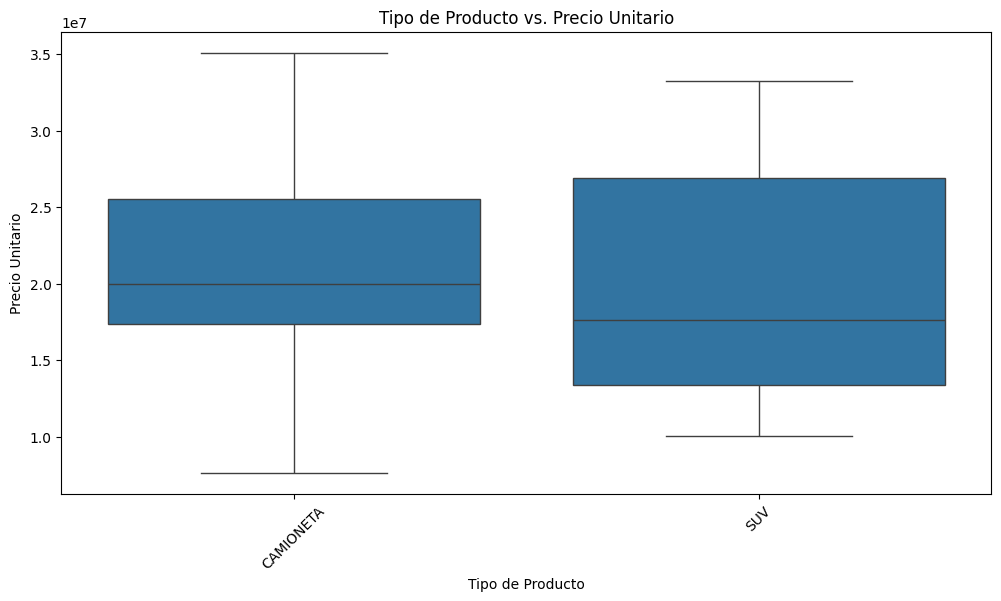

/var/folders/0c/zyxv4tr515b0drdhsbj6qwhh0000gn/T/ipykernel_62277/2103584847.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/0c/zyxv4tr515b0drdhsbj6qwhh0000gn/T/ipykernel_62277/2103584847.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


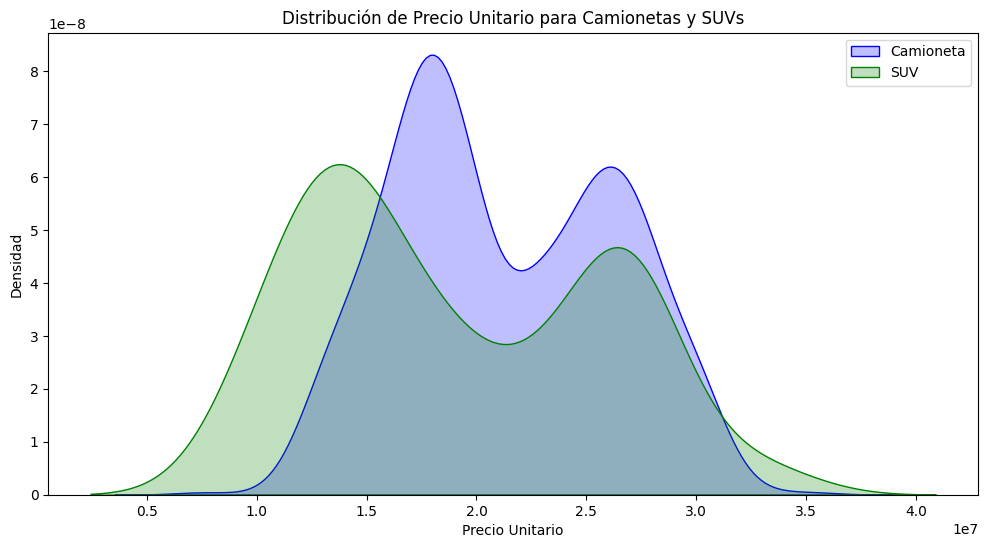

/Users/pablosanfrancisco/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pablosanfrancisco/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


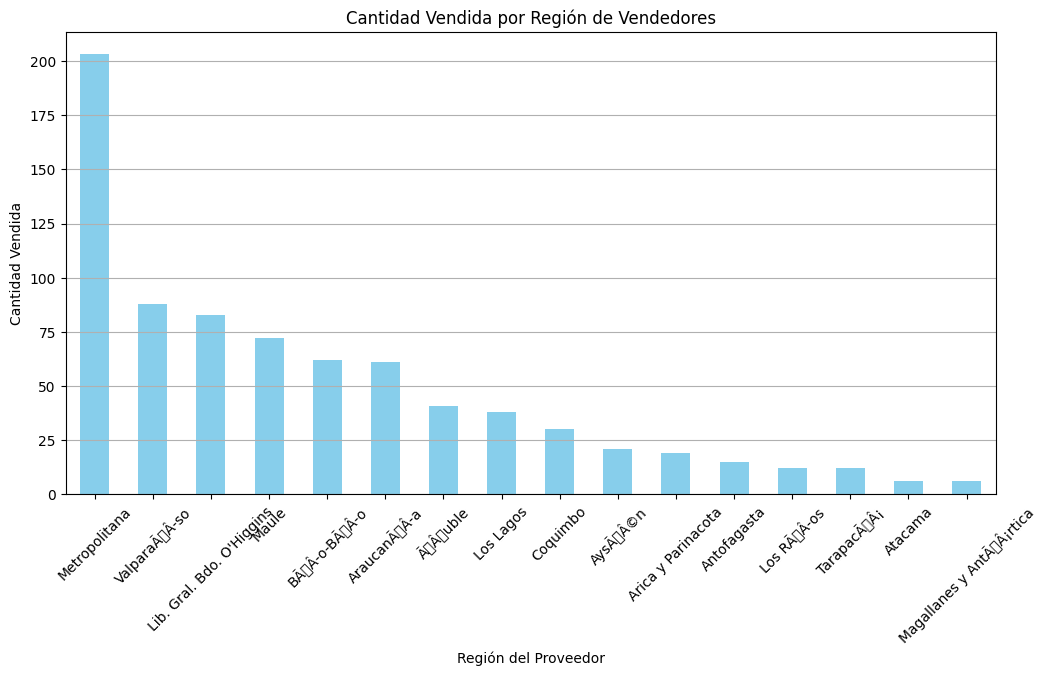

/Users/pablosanfrancisco/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/pablosanfrancisco/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


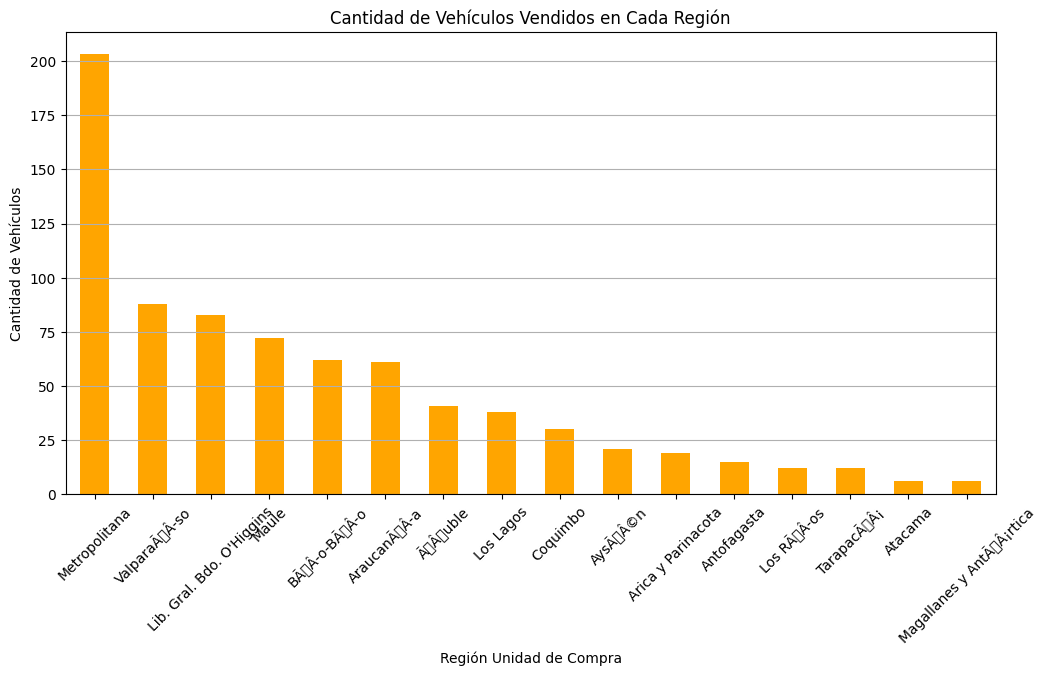

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'final_matched_data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', on_bad_lines='skip')

# Clean and preprocess the data
# Fix column names
data.columns = [col.encode('latin1').decode('utf-8', 'ignore') for col in data.columns]

# Correct encoding issues in data
data = data.applymap(lambda x: x.encode('latin1').decode('utf-8', 'ignore') if isinstance(x, str) else x)

# Ensure 'Precio Unitario' is numeric
data['Precio Unitario'] = pd.to_numeric(data['Precio Unitario'], errors='coerce')

# Chart 1: Type of vehicle vs. price box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo de Producto', y='Precio Unitario', data=data)
plt.title('Tipo de Producto vs. Precio Unitario')
plt.xlabel('Tipo de Producto')
plt.ylabel('Precio Unitario')
plt.xticks(rotation=45)
plt.show()

# Chart 2: Price distribution for pickups and SUVs in the same chart with different colors
# Filter data for pickups and SUVs
pickup_suv_data = data[data['Tipo de Producto'].isin(['CAMIONETA', 'SUV'])]

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=pickup_suv_data[pickup_suv_data['Tipo de Producto'] == 'CAMIONETA']['Precio Unitario'],
    label='Camioneta',
    shade=True,
    color='blue'
)
sns.kdeplot(
    data=pickup_suv_data[pickup_suv_data['Tipo de Producto'] == 'SUV']['Precio Unitario'],
    label='SUV',
    shade=True,
    color='green'
)
plt.title('Distribución de Precio Unitario para Camionetas y SUVs')
plt.xlabel('Precio Unitario')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Chart 3: Region of sellers vs. quantity sold
# Assume 'Región del Proveedor' is the region of sellers
region_quantity = data['RegiÃ³n Unidad de Compra'].value_counts()

plt.figure(figsize=(12, 6))
region_quantity.plot(kind='bar', color='skyblue')
plt.title('Cantidad Vendida por Región de Vendedores')
plt.xlabel('Región del Proveedor')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Chart 4: Vehicles sold in each region
# Assume 'Región Unidad de Compra' is the region where vehicles are sold
vehicles_per_region = data['RegiÃ³n Unidad de Compra'].value_counts()

plt.figure(figsize=(12, 6))
vehicles_per_region.plot(kind='bar', color='orange')
plt.title('Cantidad de Vehículos Vendidos en Cada Región')
plt.xlabel('Región Unidad de Compra')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Column names in the dataset:
Unnamed: 0
Nro LicitaciÃ³n PÃºblica
Id Convenio Marco
Convenio Marco
CodigoOC
NombreOC
Fecha EnvÃ­o OC
EstadoOC
Proviene de Gran Compra
idGranCompra
EspecificaciÃ³n del Comprador
IDProductoCM
Producto
Nombre Producto ONU
Tipo de Producto
Marca
Modelo
Precio Unitario
Cantidad
TotaLÃ­nea(Neto)
Moneda
Monto Total OC Neto
Descuento Global OC
Cargos Adicionales OC
Subtotal OC
Impuestos
Monto Total OC
Rut Unidad de Compra
Unidad de Compra
RazÃ³n Social Comprador
DirecciÃ³n Unidad Compra
Comuna Unidad Compra
RegiÃ³n Unidad de Compra
InstituciÃ³n
Sector
Rut Proveedor
Nombre Proveedor Sucursal
Nombre Empresa
Comuna del Proveedor
RegiÃ³n del Proveedor
Observaciones
Forma de Pago
Orgcode_Comprador
Entcode_Comprador
Orgcode_Proveedor
Entcode_Proveedor
MODEL
MARCA
Model Name
Engine
Drive
Transmission
Year
Version URL
Motor - Combustible
Motor - Cilindrada
Motor - Potencia
Motor - Torque
Motor - Alimentación
Motor - Cilindros
Motor - Válvulas
Motor - Catalítico
Motor - S

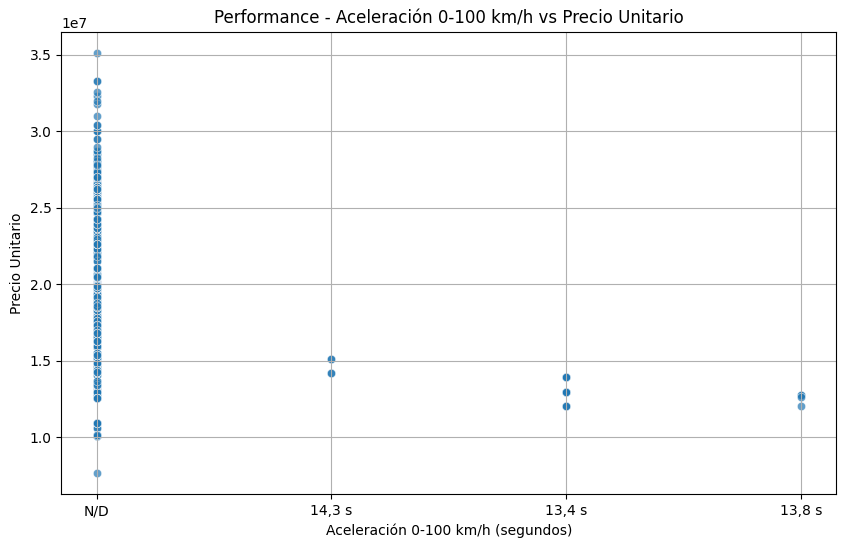

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with UTF-8 encoding
data_path = 'final_matched_data.csv'
data = pd.read_csv(data_path, encoding='utf-8', on_bad_lines='skip')

# Ensure relevant columns exist and convert them to numeric
data['Performance - Velocidad máxima'] = pd.to_numeric(
    data['Performance - Velocidad máxima'], errors='coerce'
)
data['Precio Unitario'] = pd.to_numeric(data['Precio Unitario'], errors='coerce')

print("Column names in the dataset:")
for col in data.columns:
    print(col)

# Filter the dataset for valid data in the two columns
valid_data = data.dropna(subset=['Performance - Aceleración 0-100 km/h', 'Precio Unitario'])

# Generate the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=valid_data,
    x='Performance - Aceleración 0-100 km/h',
    y='Precio Unitario',
    alpha=0.7
)
plt.title('Performance - Aceleración 0-100 km/h vs Precio Unitario')
plt.xlabel('Aceleración 0-100 km/h (segundos)')
plt.ylabel('Precio Unitario')
plt.grid()
plt.show()


#### Hacemos predicciones

In [7]:
import statsmodels.api as sm
import pandas as pd

dependent_var = 'Precio Unitario'
independent_var = 'Motor - Válvulas'

# Ensure both columns are numeric and drop rows with missing values
data[dependent_var] = pd.to_numeric(data[dependent_var], errors='coerce')
data[independent_var] = pd.to_numeric(data[independent_var], errors='coerce')

regression_data = data.dropna(subset=[dependent_var, independent_var])

# Prepare the data for regression
X = sm.add_constant(regression_data[[independent_var]])  # Add a constant for the intercept
y = regression_data[dependent_var]

# Fit the OLS regression model
reg = sm.OLS(y, X).fit()

# Print the regression summary
print(reg.summary())

# Calculate predictions and residuals
regression_data['prediction'] = reg.predict(X)
regression_data['error'] = regression_data[dependent_var] - regression_data['prediction']

# Display the first few rows of the dataset with predictions and residuals
regression_data[['prediction', 'error']].head()

0    14090600.0
1    14582400.0
2    19534588.0
3    20966723.0
4    20966723.0
Name: Precio Unitario, dtype: float64
0    16.0
1    16.0
2    16.0
3    16.0
4    16.0
Name: Motor - Válvulas, dtype: float64
(767, 162)
                            OLS Regression Results                            
Dep. Variable:        Precio Unitario   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     57.14
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.16e-13
Time:                        16:48:29   Log-Likelihood:                -12941.
No. Observations:                 767   AIC:                         2.589e+04
Df Residuals:                     765   BIC:                         2.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                  

/var/folders/0c/zyxv4tr515b0drdhsbj6qwhh0000gn/T/ipykernel_62277/4081627364.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['prediction'] = reg.predict(X)
/var/folders/0c/zyxv4tr515b0drdhsbj6qwhh0000gn/T/ipykernel_62277/4081627364.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['error'] = regression_data[dependent_var] - regression_data['prediction']


,prediction,error
0,2.119501e+07,-7.104409e+06
1,2.119501e+07,-6.612609e+06
2,2.119501e+07,-1.660421e+06
3,2.119501e+07,-2.282856e+05
4,2.119501e+07,-2.282856e+05


In [8]:
import statsmodels.api as sm
import pandas as pd

dependent_var = 'Precio Unitario'
independent_var = 'Motor - Potencia'

# Convert dependent variable to numeric
data[dependent_var] = pd.to_numeric(data[dependent_var], errors='coerce')
data[independent_var] = data[independent_var].astype(str)

# Create dummy variables (one-hot encoding)
X_dummies = pd.get_dummies(data[independent_var], prefix=independent_var, drop_first=True)

# Drop rows with missing dependent variable values
regression_data = data.dropna(subset=[dependent_var])

# Merge dummies back into the dataframe
regression_data = regression_data.join(X_dummies)

# Prepare the data
X = sm.add_constant(regression_data[X_dummies.columns])  # Add a constant to the dummy variables
y = regression_data[dependent_var]

# Fit the OLS model
reg = sm.OLS(y, X).fit()

# Print the regression summary
print(reg.summary())

# Calculate predictions and residuals
regression_data['prediction'] = reg.predict(X)
regression_data['error'] = regression_data[dependent_var] - regression_data['prediction']

# Display first few rows
print(regression_data[['prediction', 'error']].head())

                            OLS Regression Results                            
Dep. Variable:        Precio Unitario   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Dec 2024   Prob (F-statistic):                nan
Time:                        16:53:25   Log-Likelihood:                -12969.
No. Observations:                 767   AIC:                         2.594e+04
Df Residuals:                     766   BIC:                         2.594e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.095e+07   1.93e+05    108.728      0.0

logit y probit
con el merge
modelar en un logit la probabilidad